In [ ]:
# Run this if you don't have access to the dataset files localy
!pip install gdown
!gdown --folder https://drive.google.com/drive/folders/1adV3mjdYKLoA2BHhJSHUx9RiCkcR6wIN

Retrieving folder contents
Retrieving folder 1WaDe-ZsHcnay0ng3uLN66U79pcXMUgEb BRACSFeature
Processing file 1v-v1PWDDLnQHAX4q-YajgmSkaA4V_AaT patch_feats_pretrain_medical_ssl.h5
Retrieving folder 1GF2nWBNQ33BQ7wEKpa_d_iWRPVq9RRmv C16Feature
Processing file 10kF2o14LwdrIEH02Da-V1XtyTPaGoUMi patch_feats_pretrain_medical_ssl.h5
Retrieving folder 1bDXU3RymzTtFOMivuGj3Y7pUe8HjMzLA C17Feature
Processing file 1EWPoJ-8E-d78S66PDYjfK8OSVuj8bSeg patch_feats_pretrain_medical_ssl.h5
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1v-v1PWDDLnQHAX4q-YajgmSkaA4V_AaT
From (redirected): https://drive.google.com/uc?id=1v-v1PWDDLnQHAX4q-YajgmSkaA4V_AaT&confirm=t&uuid=83adea2d-c2c6-4818-9dc1-1cb3561984d7
To: /content/Feature/BRACSFeature/patch_feats_pretrain_medical_ssl.h5
100% 4.24G/4.24G [01:09<00:00, 60.9MB/s]
Failed to retrieve file url:

	Too many users have viewed or downloaded thi

In [ ]:
# Run this if you have the dataset on you dirve
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
project_path = '/content/drive/MyDrive/Project B Files/' # Change path to your drive path
%cd {project_path}

/content/drive/MyDrive/Project B Files


In [ ]:
!pip install -r requirements.txt

^C


In [ ]:
!bash run.sh

2025-12-03 17:18:56.929261: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-03 17:18:56.947780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764782336.969614   72672 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764782336.976221   72672 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764782336.993976   72672 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [ ]:
# Save the results from the last section into a .txt file
# This section seperates results for plotting
import re

# ---------- READ FILE ----------
fname = "Results2.txt" #modify file name
with open(fname, "r") as f:
    txt = f.read()

# ---------- REGEX FOR EPOCH METRICS ----------
epoch_pattern = re.compile(
    r"\* Acc@1 ([0-9\.]+) loss ([0-9\.]+) auroc ([0-9\.]+) f1_score ([0-9\.]+)"
)

# ---------- REGEX FOR BEST-EPOCH BLOCK ----------
best_pattern = re.compile(
    r"Results on best epoch:\s*\{([^}]+)\}",
    re.MULTILINE
)

# ---------- COLLECT ALL EXPERIMENTS ----------
experiments = []  # each element: dict with epoch metrics + best metrics

# Split by "Used config:" because each block starts with that
blocks = txt.split("Used config:")
blocks = blocks[1:]  # first chunk before the first config is irrelevant

for block in blocks:
    # Parse epoch-level metrics
    accs, losses, aucs, f1s = [], [], [], []

    for acc, loss, auc, f1 in epoch_pattern.findall(block):
        accs.append(float(acc))
        losses.append(float(loss))
        aucs.append(float(auc))
        f1s.append(float(f1))

    # Parse the best-epoch summary
    best = best_pattern.search(block)
    best_dict = {}
    if best:
        raw = best.group(1).strip()
        for kv in raw.split(","):
            if ":" in kv:
                key, val = kv.split(":")
                key = key.strip().strip("'")
                val = val.strip()
                try:
                    val = float(val)
                except ValueError:
                    pass
                best_dict[key] = val

    experiments.append({
        "acc_vector": accs,
        "loss_vector": losses,
        "auc_vector": aucs,
        "f1_vector": f1s,
        "best": best_dict,
    })

# ---------- OUTPUT ----------
for i, exp in enumerate(experiments):
    print(f"\n===== Experiment {i+1} =====")
    print("Acc vector (len={}):".format(len(exp["acc_vector"])))
    print(exp["acc_vector"])
    print("Loss vector (len={}):".format(len(exp["loss_vector"])))
    print(exp["loss_vector"])
    print("AUC vector (len={}):".format(len(exp["auc_vector"])))
    print(exp["auc_vector"])
    print("F1 vector (len={}):".format(len(exp["f1_vector"])))
    print(exp["f1_vector"])
    print("Best-epoch summary:", exp["best"])


===== Experiment 1 =====
Acc vector (len=100):
[66.667, 61.24, 96.296, 94.574, 96.296, 94.574, 96.296, 93.798, 96.296, 92.248, 96.296, 94.574, 92.593, 90.698, 85.185, 82.171, 96.296, 94.574, 96.296, 95.349, 96.296, 95.349, 96.296, 96.124, 100.0, 96.124, 96.296, 96.124, 96.296, 95.349, 100.0, 79.845, 96.296, 96.124, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899, 100.0, 96.899]
Loss vector (len=100):
[0.661, 0.654, 0.2, 0.237, 0.153, 0.182, 0.139, 0.213, 0.181, 0.256, 0.126, 0.258, 0.219, 0.267, 0.347, 0.38, 0.189, 0.207, 0.116, 0.184, 0.208, 0.22, 0.096, 0.209,

In [ ]:
# This section seperates results for CAMELYON16, CAMELYON17, and BRACS

acc1=experiments[0]["acc_vector"]
acc2=experiments[1]["acc_vector"]
acc3=experiments[2]["acc_vector"]

loss1=experiments[0]["loss_vector"]
loss2=experiments[1]["loss_vector"]
loss3=experiments[2]["loss_vector"]

AUC1=experiments[0]["auc_vector"]
AUC2=experiments[1]["auc_vector"]
AUC3=experiments[2]["auc_vector"]

F11=experiments[0]["f1_vector"]
F12=experiments[1]["f1_vector"]
F13=experiments[2]["f1_vector"]

val_acc1 = acc1[0::2]
test_acc1  = acc1[1::2]
val_loss1 = loss1[0::2]
test_loss1  = loss1[1::2]
val_auc1 = AUC1[0::2]
test_auc1  = AUC1[1::2]
val_f11 = F11[0::2]
test_f11= F11[1::2]

val_acc2 = acc2[0::2]
test_acc2  = acc2[1::2]
val_loss2 = loss2[0::2]
test_loss2  = loss2[1::2]
val_auc2 = AUC2[0::2]
test_auc2  = AUC2[1::2]
val_f12 = F12[0::2]
test_f12= F12[1::2]

val_acc3 = acc3[0::2]
test_acc3  = acc3[1::2]
val_loss3 = loss3[0::2]
test_loss3  = loss3[1::2]
val_auc3 = AUC3[0::2]
test_auc3  = AUC3[1::2]
val_f13 = F13[0::2]
test_f13= F13[1::2]

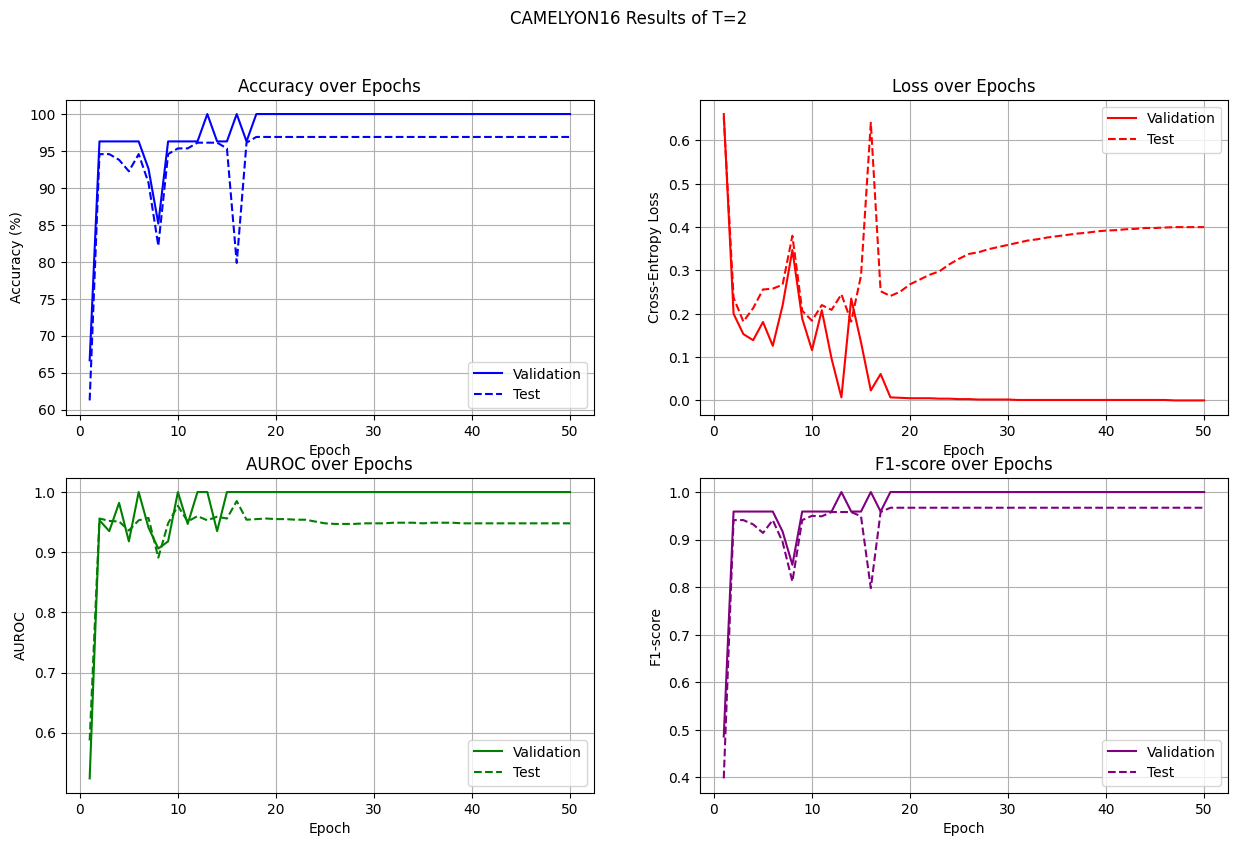

In [ ]:
# C16

import matplotlib.pyplot as plt
epochs=list(range(1,51))
fig = plt.figure(figsize=(15,9))
fig.suptitle('CAMELYON16 Results of T=2')
labels = ['Validation','Test']

# Accuracy_C16
plt.subplot(2,2,1)
plt.plot(epochs, val_acc1, linestyle='-', color='blue')
plt.plot(epochs, test_acc1, linestyle='--', color='blue')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend(labels)

# Loss_C16
plt.subplot(2,2,2)
plt.plot(epochs, val_loss1, linestyle='-', color='red')
plt.plot(epochs, test_loss1, linestyle='--', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True)
plt.legend(labels)

# AUC_C16
plt.subplot(2,2,3)
plt.plot(epochs, val_auc1, linestyle='-', color='green')
plt.plot(epochs, test_auc1, linestyle='--', color='green')
plt.title('AUROC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUROC')
plt.grid(True)
plt.legend(labels)

# F1_C16
plt.subplot(2,2,4)
plt.plot(epochs, val_f11, linestyle='-', color='purple')
plt.plot(epochs, test_f11, linestyle='--', color='purple')
plt.title('F1-score over Epochs')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.grid(True)
plt.legend(labels)

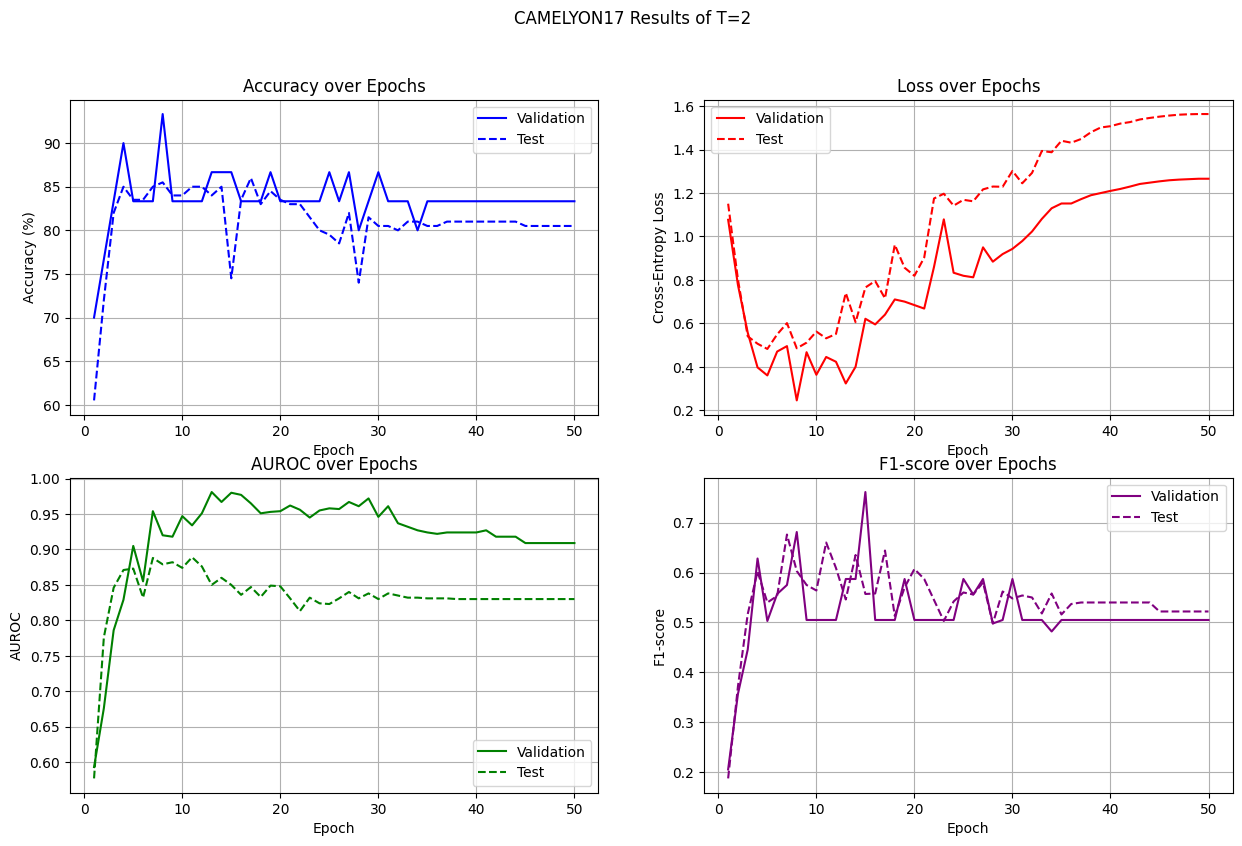

In [ ]:
# C17

import matplotlib.pyplot as plt
epochs=list(range(1,51))
fig = plt.figure(figsize=(15,9))
fig.suptitle('CAMELYON17 Results of T=2')

# Accuracy_C17
plt.subplot(2,2,1)
plt.plot(epochs, val_acc2, linestyle='-', color='blue')
plt.plot(epochs, test_acc2, linestyle='--', color='blue')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend(labels)

# Loss_C17
plt.subplot(2,2,2)
plt.plot(epochs, val_loss2, linestyle='-', color='red')
plt.plot(epochs, test_loss2, linestyle='--', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True)
plt.legend(labels)

# AUC_C17
plt.subplot(2,2,3)
plt.plot(epochs, val_auc2, linestyle='-', color='green')
plt.plot(epochs, test_auc2, linestyle='--', color='green')
plt.title('AUROC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUROC')
plt.grid(True)
plt.legend(labels)

# F1_C17
plt.subplot(2,2,4)
plt.plot(epochs, val_f12, linestyle='-', color='purple')
plt.plot(epochs, test_f12, linestyle='--', color='purple')
plt.title('F1-score over Epochs')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.grid(True)
plt.legend(labels)

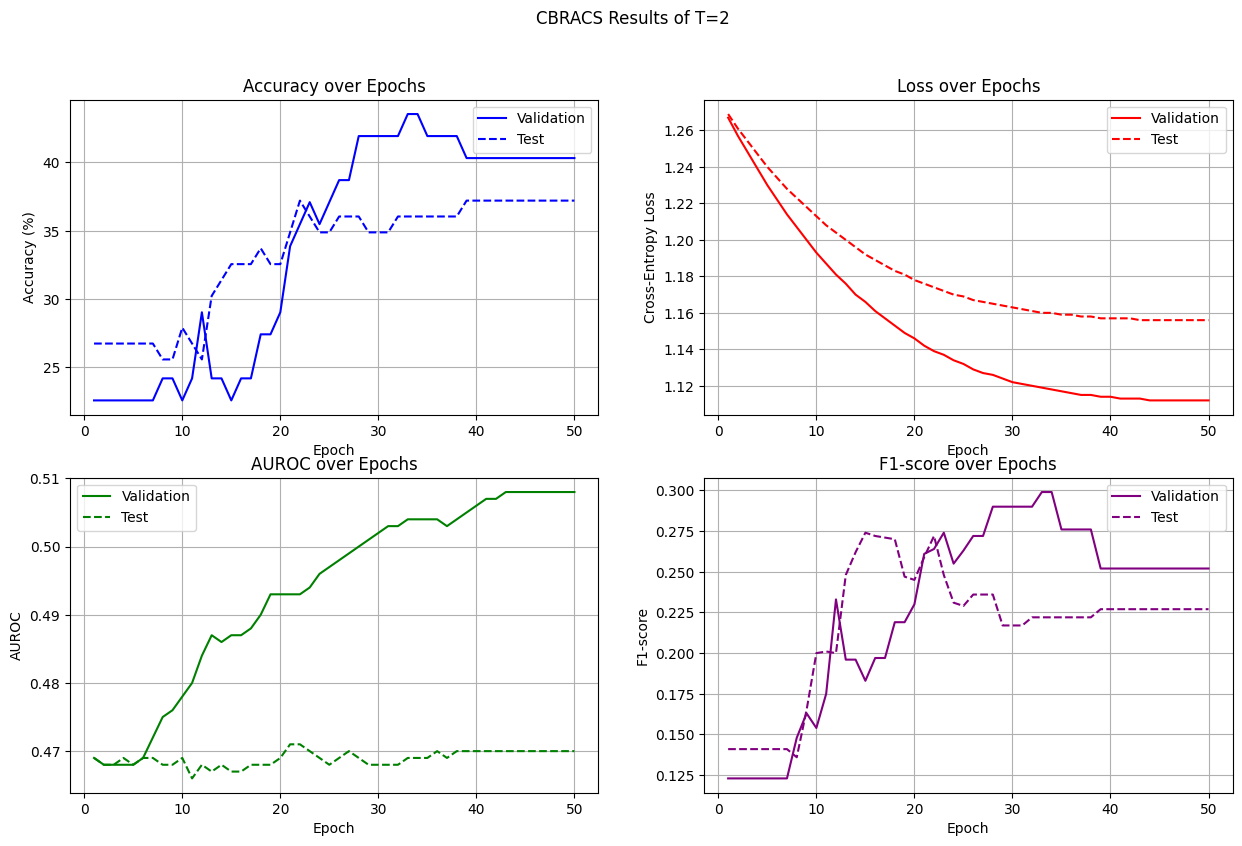

In [ ]:
# BRACs

import matplotlib.pyplot as plt
epochs=list(range(1,51))
fig = plt.figure(figsize=(15,9))
fig.suptitle('CBRACS Results of T=2')

# Accuracy_BRC
plt.subplot(2,2,1)
plt.plot(epochs, val_acc3, linestyle='-', color='blue')
plt.plot(epochs, test_acc3, linestyle='--', color='blue')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend(labels)

# Loss_BRC
plt.subplot(2,2,2)
plt.plot(epochs, val_loss3, linestyle='-', color='red')
plt.plot(epochs, test_loss3, linestyle='--', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.grid(True)
plt.legend(labels)

# AUC_BRC
plt.subplot(2,2,3)
plt.plot(epochs, val_auc3, linestyle='-', color='green')
plt.plot(epochs, test_auc3, linestyle='--', color='green')
plt.title('AUROC over Epochs')
plt.xlabel('Epoch')
plt.ylabel('AUROC')
plt.grid(True)
plt.legend(labels)

# F1_BRC
plt.subplot(2,2,4)
plt.plot(epochs, val_f13, linestyle='-', color='purple')
plt.plot(epochs, test_f13, linestyle='--', color='purple')
plt.title('F1-score over Epochs')
plt.xlabel('Epoch')
plt.ylabel('F1-score')
plt.grid(True)
plt.legend(labels)